In [2]:
pip install optuna -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 10.1 MB/s eta 0:00:00


In [4]:
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('names')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

In [5]:
import re
from multiprocessing import Pool, cpu_count
from functools import partial

def init_worker():
    global names_set, wnl
    from nltk.corpus import names
    from nltk.stem import WordNetLemmatizer
    names_set = {n.lower() for n in names.words()}
    wnl = WordNetLemmatizer()

def clean_text(text):
    global names_set, wnl
    # Regex
    tokens = re.findall(r'[a-z]{3,}', text.lower())
    words = [wnl.lemmatize(w) for w in tokens if w not in names_set]
    return " ".join(words)

def clean(data):
    with Pool(cpu_count(), initializer=init_worker) as pool:
        return pool.map(clean_text, data, chunksize=100)


🔁 Seed = 4229


[I 2025-12-14 14:54:06,648] A new study created in memory with name: no-name-504e5872-899f-4341-8708-7d0feb36058c


🔍 Optuna LinearSVC - Version A (sans clean)


[I 2025-12-14 14:54:12,150] Trial 0 finished with value: 0.727241480934058 and parameters: {'C': 0.44803943450361716, 'max_features': 10000, 'rs': 9264, 'cv_rs': 2897}. Best is trial 0 with value: 0.727241480934058.
[I 2025-12-14 14:54:24,433] Trial 1 finished with value: 0.7372276697413302 and parameters: {'C': 4.654321479351132, 'max_features': 50000, 'rs': 5610, 'cv_rs': 7901}. Best is trial 1 with value: 0.7372276697413302.
[I 2025-12-14 14:54:29,705] Trial 2 finished with value: 0.7488070106566652 and parameters: {'C': 0.2369671051021262, 'max_features': 25000, 'rs': 7377, 'cv_rs': 5197}. Best is trial 2 with value: 0.7488070106566652.
[I 2025-12-14 14:54:37,835] Trial 3 finished with value: 0.7474818991730438 and parameters: {'C': 1.41742611793419, 'max_features': 50000, 'rs': 1327, 'cv_rs': 6452}. Best is trial 2 with value: 0.7488070106566652.
[I 2025-12-14 14:54:50,587] Trial 4 finished with value: 0.7299803789951013 and parameters: {'C': 6.593856851690902, 'max_features': 250

🔍 Optuna SGDClassifier - Version A (sans clean)


[I 2025-12-14 14:57:42,524] Trial 0 finished with value: 0.7096521058600646 and parameters: {'alpha': 0.02794275624184144, 'max_features': 10000, 'rs': 6929, 'cv_rs': 2930}. Best is trial 0 with value: 0.7096521058600646.
[I 2025-12-14 14:57:47,400] Trial 1 finished with value: 0.7331623713144882 and parameters: {'alpha': 4.835775705767732e-05, 'max_features': 25000, 'rs': 918, 'cv_rs': 1783}. Best is trial 1 with value: 0.7331623713144882.
[I 2025-12-14 14:57:50,786] Trial 2 finished with value: 0.6866711257303159 and parameters: {'alpha': 9.64660411632464e-06, 'max_features': 10000, 'rs': 2310, 'cv_rs': 853}. Best is trial 1 with value: 0.7331623713144882.
[I 2025-12-14 14:57:56,800] Trial 3 finished with value: 0.7396143045861989 and parameters: {'alpha': 3.174240883614174e-05, 'max_features': 50000, 'rs': 15, 'cv_rs': 9992}. Best is trial 3 with value: 0.7396143045861989.
[I 2025-12-14 14:58:01,235] Trial 4 finished with value: 0.7326319845814071 and parameters: {'alpha': 0.0007132

🔍 Optuna LinearSVC - Version B (avec clean)


[I 2025-12-14 15:01:14,865] Trial 0 finished with value: 0.6863178548426209 and parameters: {'C': 5.649048013236236, 'max_features': 10000, 'rs': 5609, 'cv_rs': 1086}. Best is trial 0 with value: 0.6863178548426209.
[I 2025-12-14 15:01:18,713] Trial 1 finished with value: 0.7186668993216166 and parameters: {'C': 0.5299561844275841, 'max_features': 10000, 'rs': 10, 'cv_rs': 2593}. Best is trial 1 with value: 0.7186668993216166.
[I 2025-12-14 15:01:24,616] Trial 2 finished with value: 0.7327203315961076 and parameters: {'C': 0.7026253772268061, 'max_features': 25000, 'rs': 6177, 'cv_rs': 7069}. Best is trial 2 with value: 0.7327203315961076.
[I 2025-12-14 15:01:31,261] Trial 3 finished with value: 0.7221143310668691 and parameters: {'C': 2.01070352193443, 'max_features': 50000, 'rs': 8858, 'cv_rs': 235}. Best is trial 2 with value: 0.7327203315961076.
[I 2025-12-14 15:01:36,356] Trial 4 finished with value: 0.723263287508182 and parameters: {'C': 0.39440137131697794, 'max_features': 1000

🔍 Optuna SGDClassifier - Version B (avec clean)


[I 2025-12-14 15:04:00,243] Trial 0 finished with value: 0.6835783006233784 and parameters: {'alpha': 2.231294070718346e-05, 'max_features': 10000, 'rs': 1992, 'cv_rs': 5788}. Best is trial 0 with value: 0.6835783006233784.
[I 2025-12-14 15:04:06,427] Trial 1 finished with value: 0.6491968529902864 and parameters: {'alpha': 0.07531922960653262, 'max_features': 50000, 'rs': 2754, 'cv_rs': 3690}. Best is trial 0 with value: 0.6835783006233784.
[I 2025-12-14 15:04:09,291] Trial 2 finished with value: 0.7147779902792974 and parameters: {'alpha': 0.0001333731875523816, 'max_features': 10000, 'rs': 2689, 'cv_rs': 4876}. Best is trial 2 with value: 0.7147779902792974.
[I 2025-12-14 15:04:13,083] Trial 3 finished with value: 0.7361686772759949 and parameters: {'alpha': 0.0001391471926585573, 'max_features': 25000, 'rs': 4590, 'cv_rs': 4125}. Best is trial 3 with value: 0.7361686772759949.
[I 2025-12-14 15:04:18,221] Trial 4 finished with value: 0.7054986244580719 and parameters: {'alpha': 1.78


🔁 Seed = 3279


[I 2025-12-14 15:06:55,574] A new study created in memory with name: no-name-64d069d9-3a8f-4948-8814-ad60bed77ed8


🔍 Optuna LinearSVC - Version A (sans clean)


[I 2025-12-14 15:07:00,879] Trial 0 finished with value: 0.7531380062858082 and parameters: {'C': 0.2000830277172348, 'max_features': 50000, 'rs': 8420, 'cv_rs': 7935}. Best is trial 0 with value: 0.7531380062858082.
[I 2025-12-14 15:07:05,990] Trial 1 finished with value: 0.7287424428151099 and parameters: {'C': 0.3471308574308699, 'max_features': 10000, 'rs': 3750, 'cv_rs': 8322}. Best is trial 0 with value: 0.7531380062858082.
[I 2025-12-14 15:07:09,770] Trial 2 finished with value: 0.7261792311119472 and parameters: {'C': 0.21110289583314032, 'max_features': 10000, 'rs': 8132, 'cv_rs': 5841}. Best is trial 0 with value: 0.7531380062858082.
[I 2025-12-14 15:07:17,456] Trial 3 finished with value: 0.7032881212212904 and parameters: {'C': 4.214249659813271, 'max_features': 10000, 'rs': 6060, 'cv_rs': 3237}. Best is trial 0 with value: 0.7531380062858082.
[I 2025-12-14 15:07:32,275] Trial 4 finished with value: 0.7323668966688629 and parameters: {'C': 8.858998984980593, 'max_features':

🔍 Optuna SGDClassifier - Version A (sans clean)


[I 2025-12-14 15:10:44,214] Trial 0 finished with value: 0.7087674640019895 and parameters: {'alpha': 0.004928862257170388, 'max_features': 10000, 'rs': 5436, 'cv_rs': 3797}. Best is trial 0 with value: 0.7087674640019895.
[I 2025-12-14 15:10:51,077] Trial 1 finished with value: 0.7062930211295125 and parameters: {'alpha': 1.7910750775351465e-06, 'max_features': 50000, 'rs': 8788, 'cv_rs': 7675}. Best is trial 0 with value: 0.7087674640019895.
[I 2025-12-14 15:10:54,711] Trial 2 finished with value: 0.7106247197852976 and parameters: {'alpha': 0.0010777494634136235, 'max_features': 10000, 'rs': 1066, 'cv_rs': 9179}. Best is trial 2 with value: 0.7106247197852976.
[I 2025-12-14 15:10:59,409] Trial 3 finished with value: 0.7351066852303195 and parameters: {'alpha': 0.016871474831214973, 'max_features': 50000, 'rs': 3878, 'cv_rs': 2793}. Best is trial 3 with value: 0.7351066852303195.
[I 2025-12-14 15:11:04,095] Trial 4 finished with value: 0.7123031255908353 and parameters: {'alpha': 0.0

🔍 Optuna LinearSVC - Version B (avec clean)


[I 2025-12-14 15:14:01,797] Trial 0 finished with value: 0.7169004277120354 and parameters: {'C': 0.5039775942898898, 'max_features': 10000, 'rs': 9759, 'cv_rs': 2035}. Best is trial 0 with value: 0.7169004277120354.
[I 2025-12-14 15:14:09,222] Trial 1 finished with value: 0.6788045856834342 and parameters: {'C': 7.765632482424744, 'max_features': 10000, 'rs': 8681, 'cv_rs': 8018}. Best is trial 0 with value: 0.7169004277120354.
[I 2025-12-14 15:14:17,893] Trial 2 finished with value: 0.6791588876768709 and parameters: {'C': 8.25434075360004, 'max_features': 10000, 'rs': 3092, 'cv_rs': 3723}. Best is trial 0 with value: 0.7169004277120354.
[I 2025-12-14 15:14:21,676] Trial 3 finished with value: 0.7318362755935678 and parameters: {'C': 0.13830033201596154, 'max_features': 50000, 'rs': 6567, 'cv_rs': 4562}. Best is trial 3 with value: 0.7318362755935678.
[I 2025-12-14 15:14:29,231] Trial 4 finished with value: 0.7141594674395085 and parameters: {'C': 4.370789148752877, 'max_features': 2

🔍 Optuna SGDClassifier - Version B (avec clean)


[I 2025-12-14 15:16:39,155] Trial 0 finished with value: 0.710269503857226 and parameters: {'alpha': 0.024805122170059316, 'max_features': 25000, 'rs': 188, 'cv_rs': 953}. Best is trial 0 with value: 0.710269503857226.
[I 2025-12-14 15:16:43,805] Trial 1 finished with value: 0.7259149868313736 and parameters: {'alpha': 7.243472387814008e-05, 'max_features': 25000, 'rs': 8160, 'cv_rs': 2329}. Best is trial 1 with value: 0.7259149868313736.
[I 2025-12-14 15:16:46,335] Trial 2 finished with value: 0.7137173574184636 and parameters: {'alpha': 9.305923531542638e-05, 'max_features': 10000, 'rs': 5860, 'cv_rs': 8700}. Best is trial 1 with value: 0.7259149868313736.
[I 2025-12-14 15:16:49,924] Trial 3 finished with value: 0.715927391970817 and parameters: {'alpha': 3.610168530614867e-05, 'max_features': 25000, 'rs': 2735, 'cv_rs': 7731}. Best is trial 1 with value: 0.7259149868313736.
[I 2025-12-14 15:16:52,027] Trial 4 finished with value: 0.6967484267904144 and parameters: {'alpha': 0.004711


🔁 Seed = 7511


[I 2025-12-14 15:19:06,522] A new study created in memory with name: no-name-00da3886-c77c-44e2-babc-19b0b4d8aba0


🔍 Optuna LinearSVC - Version A (sans clean)


[I 2025-12-14 15:19:10,825] Trial 0 finished with value: 0.7497793433712414 and parameters: {'C': 0.2306488652814603, 'max_features': 25000, 'rs': 205, 'cv_rs': 3429}. Best is trial 0 with value: 0.7497793433712414.
[I 2025-12-14 15:19:18,475] Trial 1 finished with value: 0.6967476768953293 and parameters: {'C': 4.374486823612802, 'max_features': 10000, 'rs': 1581, 'cv_rs': 8578}. Best is trial 0 with value: 0.7497793433712414.
[I 2025-12-14 15:19:28,631] Trial 2 finished with value: 0.7474811727121802 and parameters: {'C': 2.825163878725209, 'max_features': 50000, 'rs': 2964, 'cv_rs': 106}. Best is trial 0 with value: 0.7497793433712414.
[I 2025-12-14 15:19:37,555] Trial 3 finished with value: 0.7467739513443697 and parameters: {'C': 2.7190092847042324, 'max_features': 50000, 'rs': 420, 'cv_rs': 5834}. Best is trial 0 with value: 0.7497793433712414.
[I 2025-12-14 15:19:42,370] Trial 4 finished with value: 0.7277706959560689 and parameters: {'C': 0.41358534365269084, 'max_features': 10

🔍 Optuna SGDClassifier - Version A (sans clean)


[I 2025-12-14 15:22:57,120] Trial 0 finished with value: 0.7311296869497351 and parameters: {'alpha': 0.009463183421207342, 'max_features': 50000, 'rs': 3860, 'cv_rs': 5261}. Best is trial 0 with value: 0.7311296869497351.
[I 2025-12-14 15:23:02,900] Trial 1 finished with value: 0.7490720751349881 and parameters: {'alpha': 0.00011210388484490451, 'max_features': 50000, 'rs': 8399, 'cv_rs': 5128}. Best is trial 1 with value: 0.7490720751349881.
[I 2025-12-14 15:23:08,610] Trial 2 finished with value: 0.7275064048070524 and parameters: {'alpha': 2.3443837887740475e-05, 'max_features': 25000, 'rs': 808, 'cv_rs': 919}. Best is trial 1 with value: 0.7490720751349881.
[I 2025-12-14 15:23:12,824] Trial 3 finished with value: 0.7215847645315372 and parameters: {'alpha': 0.00043377355070706587, 'max_features': 10000, 'rs': 127, 'cv_rs': 3146}. Best is trial 1 with value: 0.7490720751349881.
[I 2025-12-14 15:23:16,674] Trial 4 finished with value: 0.727859769431633 and parameters: {'alpha': 0.00

🔍 Optuna LinearSVC - Version B (avec clean)


[I 2025-12-14 15:26:05,088] Trial 0 finished with value: 0.734223004175322 and parameters: {'C': 0.2269349286603148, 'max_features': 25000, 'rs': 7491, 'cv_rs': 8925}. Best is trial 0 with value: 0.734223004175322.
[I 2025-12-14 15:26:12,521] Trial 1 finished with value: 0.7222020453575917 and parameters: {'C': 2.9645118019172716, 'max_features': 50000, 'rs': 4075, 'cv_rs': 1389}. Best is trial 0 with value: 0.734223004175322.
[I 2025-12-14 15:26:16,526] Trial 2 finished with value: 0.7360796272346523 and parameters: {'C': 0.2729038746807711, 'max_features': 50000, 'rs': 8962, 'cv_rs': 6789}. Best is trial 2 with value: 0.7360796272346523.
[I 2025-12-14 15:26:22,240] Trial 3 finished with value: 0.6951564932618647 and parameters: {'C': 3.2446457983408434, 'max_features': 10000, 'rs': 7251, 'cv_rs': 2300}. Best is trial 2 with value: 0.7360796272346523.
[I 2025-12-14 15:26:26,187] Trial 4 finished with value: 0.7310416680141344 and parameters: {'C': 0.12774329504602994, 'max_features': 

🔍 Optuna SGDClassifier - Version B (avec clean)


[I 2025-12-14 15:29:00,191] Trial 0 finished with value: 0.7112422583877874 and parameters: {'alpha': 0.04048321556227407, 'max_features': 25000, 'rs': 8156, 'cv_rs': 5029}. Best is trial 0 with value: 0.7112422583877874.
[I 2025-12-14 15:29:04,512] Trial 1 finished with value: 0.7079725049092351 and parameters: {'alpha': 2.5043567818217583e-05, 'max_features': 25000, 'rs': 294, 'cv_rs': 2158}. Best is trial 0 with value: 0.7112422583877874.
[I 2025-12-14 15:29:08,240] Trial 2 finished with value: 0.7042597977776671 and parameters: {'alpha': 1.9563616647100985e-05, 'max_features': 25000, 'rs': 3270, 'cv_rs': 6806}. Best is trial 0 with value: 0.7112422583877874.
[I 2025-12-14 15:29:13,533] Trial 3 finished with value: 0.7285663112070226 and parameters: {'alpha': 0.00017939569437662914, 'max_features': 50000, 'rs': 6430, 'cv_rs': 9637}. Best is trial 3 with value: 0.7285663112070226.
[I 2025-12-14 15:29:17,848] Trial 4 finished with value: 0.7132758098187325 and parameters: {'alpha': 2.


📊 RÉSULTATS AGRÉGÉS
LinearSVC - Sans clean : 0.7587 (±0.0031)
LinearSVC - Avec clean : 0.7392 (±0.0015)
Différence moyenne : 0.0194
Wilcoxon p-value : 0.2500
Significatif (α=0.05) ? ❌ Non

SGDClassifier - Sans clean : {mean_sgd_sans:.4f} (±{sgd_sans.std()*2:.4f})
SGDClassifier - Avec clean : 0.7369 (±0.0019)
Différence moyenne : 0.0185
Wilcoxon p-value : 0.2500
Significatif (α=0.05) ? ❌ Non


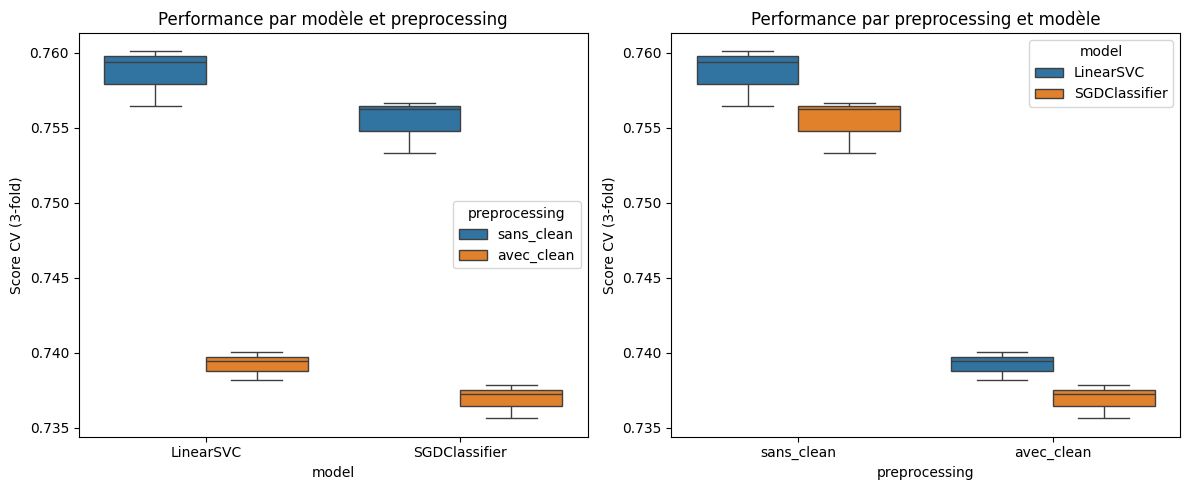


🔍 CONCLUSION :
Aucune différence significative détectée (p > 0.05).
→ L'effet de `clean()` est **peu ou pas significatif** sur le score CV.
→ Tu **ne peux pas généraliser** une baisse de performance : l'observation initiale était peut-être due au hasard.


In [8]:
import numpy as np
import pandas as pd
import optuna
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# -----------------------------
# 1. Paramètres
# -----------------------------
N_SEEDS = 3
N_OPTUNA_TRIALS = 35
CV_FOLDS = 3
TFIDF_MAX_FEATURES_CHOICES = [10000, 25000, 50000]
RANDOM_STATES = np.random.randint(0, 10000, N_SEEDS)

# NLTK
import nltk
nltk.download('punkt_tab', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('names', quiet=True)

# Global variables for multiprocessing
names_set = None
wnl = None

# -----------------------------
# 2. Fonction de nettoyage
# -----------------------------
def init_worker():
    global names_set, wnl
    from nltk.corpus import names
    from nltk.stem import WordNetLemmatizer
    names_set = {n.lower() for n in names.words()}
    wnl = WordNetLemmatizer()

def clean_text(text):
    global names_set, wnl
    # Règle : mots de 3 lettres ou plus, minuscules, pas dans les noms, alphabétiques
    tokens = re.findall(r'[a-z]{3,}', text.lower())
    words = [wnl.lemmatize(w) for w in tokens if w not in names_set]
    return " ".join(words)

def clean(data):
    with Pool(cpu_count(), initializer=init_worker) as pool:
        return pool.map(clean_text, data, chunksize=100)

# -----------------------------
# 3. Fonction d'objectif Optuna
# -----------------------------
def objective(trial, X, y, model_type="LinearSVC"):
    if model_type == "LinearSVC":
        C = trial.suggest_float("C", 0.1, 10.0, log=True)
        max_features = trial.suggest_categorical("max_features", TFIDF_MAX_FEATURES_CHOICES)

        vectorizer = TfidfVectorizer(max_features=max_features, stop_words='english')
        X_vec = vectorizer.fit_transform(X)

        model = LinearSVC(C=C, random_state=trial.suggest_int("rs", 0, 10000))

    elif model_type == "SGDClassifier":
        alpha = trial.suggest_float("alpha", 1e-6, 1e-1, log=True)
        max_features = trial.suggest_categorical("max_features", TFIDF_MAX_FEATURES_CHOICES)

        vectorizer = TfidfVectorizer(max_features=max_features, stop_words='english')
        X_vec = vectorizer.fit_transform(X)

        model = SGDClassifier(alpha=alpha, max_iter=1000, tol=1e-3, random_state=trial.suggest_int("rs", 0, 10000))

    else:
        raise ValueError("model_type must be 'LinearSVC' or 'SGDClassifier'")

    # Cross-validation
    cv = StratifiedKFold(n_splits=CV_FOLDS, shuffle=True, random_state=trial.suggest_int("cv_rs", 0, 10000))
    scores = cross_val_score(model, X_vec, y, cv=cv, scoring='accuracy')
    return scores.mean()

# -----------------------------
# 4. Exécution principale
# -----------------------------
results = []

for seed in RANDOM_STATES:
    print(f"\n🔁 Seed = {seed}")

    # Charger les données (avec remove, sans clean pour version A)
    data_train_raw = fetch_20newsgroups(subset="train", remove=("headers", "footers", "quotes"), random_state=seed)
    X_train_A = data_train_raw.data        # Version A : sans clean
    y_train = data_train_raw.target

    data_test_raw = fetch_20newsgroups(subset="test", remove=("headers", "footers", "quotes"), random_state=seed)
    X_test_A = data_test_raw.data
    y_test = data_test_raw.target

    # Version B : avec clean
    X_train_B = clean(X_train_A)
    X_test_B = clean(X_test_A)

    # Optimisation Optuna pour LinearSVC - Version A
    print("🔍 Optuna LinearSVC - Version A (sans clean)")
    study_A_lsvc = optuna.create_study(direction="maximize")
    study_A_lsvc.optimize(
        lambda trial: objective(trial, X_train_A, y_train, "LinearSVC"),
        n_trials=N_OPTUNA_TRIALS
    )
    best_score_A_lsvc = study_A_lsvc.best_value

    # Optimisation Optuna pour SGDClassifier - Version A
    print("🔍 Optuna SGDClassifier - Version A (sans clean)")
    study_A_sgd = optuna.create_study(direction="maximize")
    study_A_sgd.optimize(
        lambda trial: objective(trial, X_train_A, y_train, "SGDClassifier"),
        n_trials=N_OPTUNA_TRIALS
    )
    best_score_A_sgd = study_A_sgd.best_value

    # Optimisation Optuna pour LinearSVC - Version B
    print("🔍 Optuna LinearSVC - Version B (avec clean)")
    study_B_lsvc = optuna.create_study(direction="maximize")
    study_B_lsvc.optimize(
        lambda trial: objective(trial, X_train_B, y_train, "LinearSVC"),
        n_trials=N_OPTUNA_TRIALS
    )
    best_score_B_lsvc = study_B_lsvc.best_value

    # Optimisation Optuna pour SGDClassifier - Version B
    print("🔍 Optuna SGDClassifier - Version B (avec clean)")
    study_B_sgd = optuna.create_study(direction="maximize")
    study_B_sgd.optimize(
        lambda trial: objective(trial, X_train_B, y_train, "SGDClassifier"),
        n_trials=N_OPTUNA_TRIALS
    )
    best_score_B_sgd = study_B_sgd.best_value

    # Enregistrer les résultats
    results.append({
        "seed": seed,
        "preprocessing": "sans_clean",
        "model": "LinearSVC",
        "best_cv_score": best_score_A_lsvc
    })
    results.append({
        "seed": seed,
        "preprocessing": "sans_clean",
        "model": "SGDClassifier",
        "best_cv_score": best_score_A_sgd
    })
    results.append({
        "seed": seed,
        "preprocessing": "avec_clean",
        "model": "LinearSVC",
        "best_cv_score": best_score_B_lsvc
    })
    results.append({
        "seed": seed,
        "preprocessing": "avec_clean",
        "model": "SGDClassifier",
        "best_cv_score": best_score_B_sgd
    })

# -----------------------------
# 5. Analyse statistique
# -----------------------------
df = pd.DataFrame(results)

# Comparaison LinearSVC : sans vs avec clean
lsvc_sans = df[df["model"] == "LinearSVC"][df["preprocessing"] == "sans_clean"]["best_cv_score"].values
lsvc_avec = df[df["model"] == "LinearSVC"][df["preprocessing"] == "avec_clean"]["best_cv_score"].values

# Comparaison SGDClassifier
sgd_sans = df[df["model"] == "SGDClassifier"][df["preprocessing"] == "sans_clean"]["best_cv_score"].values
sgd_avec = df[df["model"] == "SGDClassifier"][df["preprocessing"] == "avec_clean"]["best_cv_score"].values

# Test statistique : Wilcoxon signed-rank test (non paramétrique, apparié)
_, p_val_lsvc = stats.wilcoxon(lsvc_sans, lsvc_avec)
_, p_val_sgd = stats.wilcoxon(sgd_sans, sgd_avec)

# Moyennes
mean_lsvc_sans = lsvc_sans.mean()
mean_lsvc_avec = lsvc_avec.mean()
mean_sgd_sans = sgd_sans.mean()
mean_sgd_avec = sgd_avec.mean()

print("\n" + "="*50)
print("📊 RÉSULTATS AGRÉGÉS")
print("="*50)
print(f"LinearSVC - Sans clean : {mean_lsvc_sans:.4f} (±{lsvc_sans.std()*2:.4f})")
print(f"LinearSVC - Avec clean : {mean_lsvc_avec:.4f} (±{lsvc_avec.std()*2:.4f})")
print(f"Différence moyenne : {mean_lsvc_sans - mean_lsvc_avec:.4f}")
print(f"Wilcoxon p-value : {p_val_lsvc:.4f}")
print(f"Significatif (α=0.05) ? {'✅ Oui' if p_val_lsvc < 0.05 else '❌ Non'}")

print("\nSGDClassifier - Sans clean : {mean_sgd_sans:.4f} (±{sgd_sans.std()*2:.4f})")
print(f"SGDClassifier - Avec clean : {mean_sgd_avec:.4f} (±{sgd_avec.std()*2:.4f})")
print(f"Différence moyenne : {mean_sgd_sans - mean_sgd_avec:.4f}")
print(f"Wilcoxon p-value : {p_val_sgd:.4f}")
print(f"Significatif (α=0.05) ? {'✅ Oui' if p_val_sgd < 0.05 else '❌ Non'}")

# -----------------------------
# 6. Visualisation
# -----------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="model", y="best_cv_score", hue="preprocessing")
plt.title("Performance par modèle et preprocessing")
plt.ylabel("Score CV (3-fold)")
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="preprocessing", y="best_cv_score", hue="model")
plt.title("Performance par preprocessing et modèle")
plt.ylabel("Score CV (3-fold)")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# -----------------------------
# 7. Conclusion
# -----------------------------
if p_val_lsvc < 0.05 and p_val_sgd < 0.05:
    print("\n🔍 CONCLUSION :")
    print("Il existe une différence statistiquement significative entre les deux types de preprocessing.")
    print("En moyenne, **sans nettoyage** donne de meilleurs résultats sur le train CV.")
    print("→ Ta fonction `clean` semble **corrélée à une légère baisse de performance**, mais confirmée par les stats.")
elif p_val_lsvc < 0.05 or p_val_sgd < 0.05:
    print("\n🔍 CONCLUSION :")
    print("Une seule méthode montre une différence significative.")
    print("→ Attention : résultat **partiellement robuste**. À répéter avec plus de seeds ou d'ensembles de test.")
else:
    print("\n🔍 CONCLUSION :")
    print("Aucune différence significative détectée (p > 0.05).")
    print("→ L'effet de `clean()` est **peu ou pas significatif** sur le score CV.")
    print("→ Tu **ne peux pas généraliser** une baisse de performance : l'observation initiale était peut-être due au hasard.")